In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import statsmodels.api as sm
from ucimlrepo import fetch_ucirepo


In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

In [4]:
# Define features and target variable
X = df[["BloodPressure", "BMI", "Pregnancies", "Glucose", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "Age"]].values
y = df["Outcome"].values

In [5]:
# Add constant term for intercept
X = sm.add_constant(X)

In [6]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.459388
         Iterations 6


In [8]:
# Print model coefficients and p-values
coefficients = result.params
p_values = result.pvalues

In [9]:
# Predict probabilities and convert to binary outcomes
y_pred_initial = result.predict(X_test)
y_pred = (y_pred_initial >= 0.5).astype(int)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


In [11]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

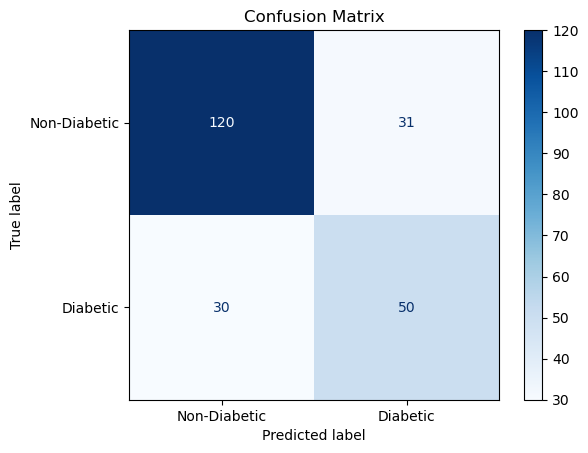

In [12]:
# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Diabetic", "Diabetic"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_initial)
roc_auc = roc_auc_score(y_test, y_pred_initial)

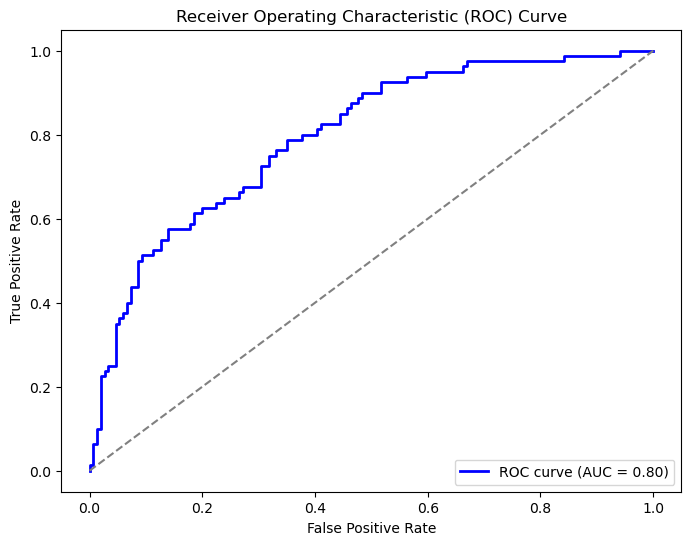

In [14]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Output results
coefficients, p_values, accuracy, conf_matrix, roc_auc

(array([-9.44512077e+00, -1.08488250e-02,  1.09022490e-01,  5.80291293e-02,
         3.58735148e-02, -1.52536782e-03, -9.90644821e-04,  4.21462324e-01,
         3.59464082e-02]),
 array([5.67433716e-25, 1.13229337e-01, 9.45435059e-09, 1.39614463e-01,
        1.21711736e-14, 8.57577946e-01, 3.76611947e-01, 2.37310858e-01,
        1.89335429e-03]),
 0.7359307359307359,
 array([[120,  31],
        [ 30,  50]], dtype=int64),
 0.7971854304635763)

In [16]:
!pip install ucimlrepo

In [34]:
# Fetch the Air Quality dataset from UCI repository
air_quality = fetch_ucirepo(id=360)

In [36]:
# Extract features and target
X = air_quality.data.features
y = air_quality.data.targets

In [38]:
# Display metadata and variable information
metadata = air_quality.metadata
variables_info = air_quality.variables

In [40]:
# Show dataset summary
X.head(), y.head(), metadata, variables_info

AttributeError: 'NoneType' object has no attribute 'head'

In [68]:
# Read the CSV file into a DataFrame
df = pd.read_csv("AirQualityUCI.csv", sep=';')  # Assuming separator is a semicolon based on UCI formats


In [70]:
# Display the first few rows to inspect the dataset
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [72]:
# Drop unnecessary unnamed columns
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"], errors='ignore')


In [74]:
# Replace commas with periods in numerical columns
df = df.replace(',', '.', regex=True)

In [76]:
# Convert numerical columns to float
numeric_columns = df.columns[2:]  # Skip 'Date' and 'Time'
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [78]:
# Combine Date and Time columns into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

In [80]:
# Drop original Date and Time columns
df = df.drop(columns=['Date', 'Time'])

In [82]:
# Reorder columns to have Datetime first
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]

In [86]:
# Display the first ten rows to inspect the dataset
df.head(10)

,Datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11 00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11 01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11 02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11 03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [88]:
# Handle missing and infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
X.dropna(inplace=True)  # Drop rows with NaN values

In [90]:
# Ensure target variable aligns with cleaned X data
y = y.loc[X.index]

AttributeError: 'NoneType' object has no attribute 'loc'

In [92]:
# Redefine the target variable based on cleaned data
df['AirQualityBinary'] = (df['CO(GT)'] > df['CO(GT)'].median()).astype(int)

In [94]:
# Re-extract features (excluding Datetime and the target column)
X = df.drop(columns=['Datetime', 'CO(GT)', 'AirQualityBinary'])  
y = df['AirQualityBinary']

In [96]:
# Ensure no missing or infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)  
X.dropna(inplace=True)

In [98]:
# Ensure target variable aligns with cleaned feature set
y = y.loc[X.index]

In [100]:
# Add constant term for intercept
X = sm.add_constant(X)

In [104]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.248051
         Iterations 9


In [108]:
# Predict probabilities and classify
y_pred_probs = result.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

In [110]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [112]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

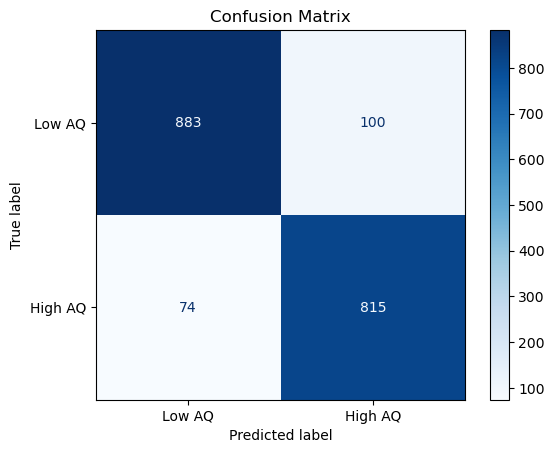

In [114]:
# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Low AQ", "High AQ"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [118]:
# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

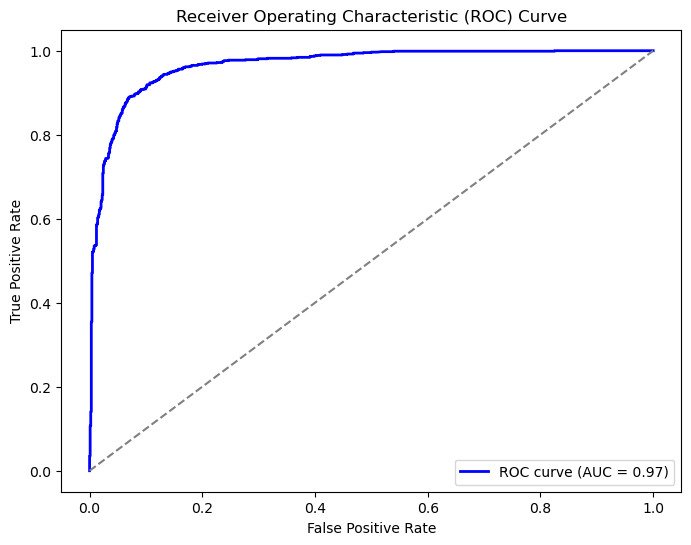

In [120]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # No discrimination line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [122]:
# Output model results
result.summary(), accuracy, conf_matrix, roc_auc

(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:       AirQualityBinary   No. Observations:                 7485
 Model:                          Logit   Df Residuals:                     7472
 Method:                           MLE   Df Model:                           12
 Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                  0.6418
 Time:                        16:13:45   Log-Likelihood:                -1856.7
 converged:                       True   LL-Null:                       -5183.5
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------------------
 const           -33.3976      1.577    -21.174      0.000     -36.489     -30.306
 PT08.S1(CO)       0.0038      0.001      6.124      0.000   

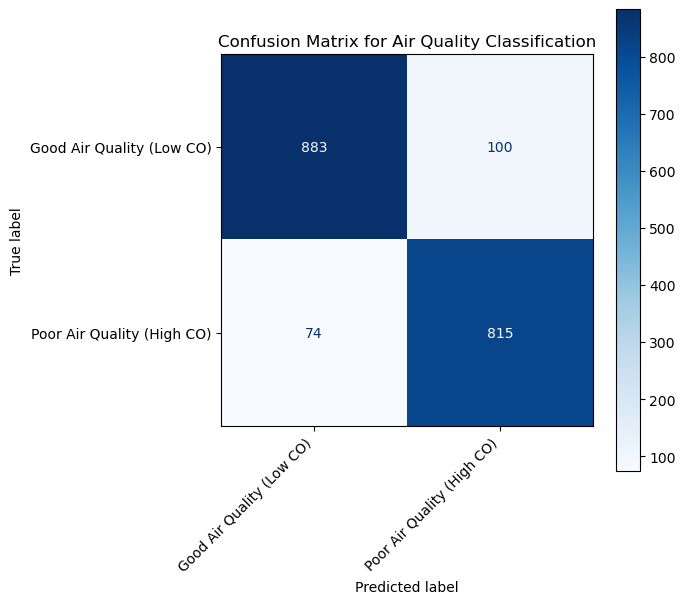

In [126]:
# Plot confusion matrix with rotated x-axis labels
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Good Air Quality (Low CO)", "Poor Air Quality (High CO)"])
disp.plot(cmap="Blues", ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix for Air Quality Classification")
plt.show()